<a href="https://colab.research.google.com/github/Anuraggupta07/CrackVision---Software-Integrated-Bridge-Inspection/blob/main/BRIDGE_INSPECTION_DRONE_IMPLE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# prompt: !nvidia-smi

!nvidia-smi


/bin/bash: line 1: nvidia-smi: command not found


In [2]:
!pip install tensorflow

In [3]:
  # Step 1: Import necessary libraries
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.applications import ResNet50
from keras.applications.resnet50 import preprocess_input
import numpy as np

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# Define the paths to the dataset
train_dir = '/content/drive/MyDrive/Bridge inspection drone/train'
valid_dir = '/content/drive/MyDrive/Bridge inspection drone/val'



In [6]:
# Constants for image processing
image_resize = 224
batch_size = 32
num_classes = 2

In [7]:
# Function to display images from the dataset
def display_images(images_paths, titles, rows=1):
    if not images_paths:
        print("No images to display.")
        return

    fig, axes = plt.subplots(rows, len(images_paths)//rows, figsize=(20, 4*rows))
    if len(images_paths) == 1:
        axes = [axes]
    for ax, img_path, title in zip(axes, images_paths, titles):
        img = mpimg.imread(img_path)
        ax.imshow(img)
        ax.set_title(title)
        ax.axis('off')
    plt.tight_layout()
    plt.show()


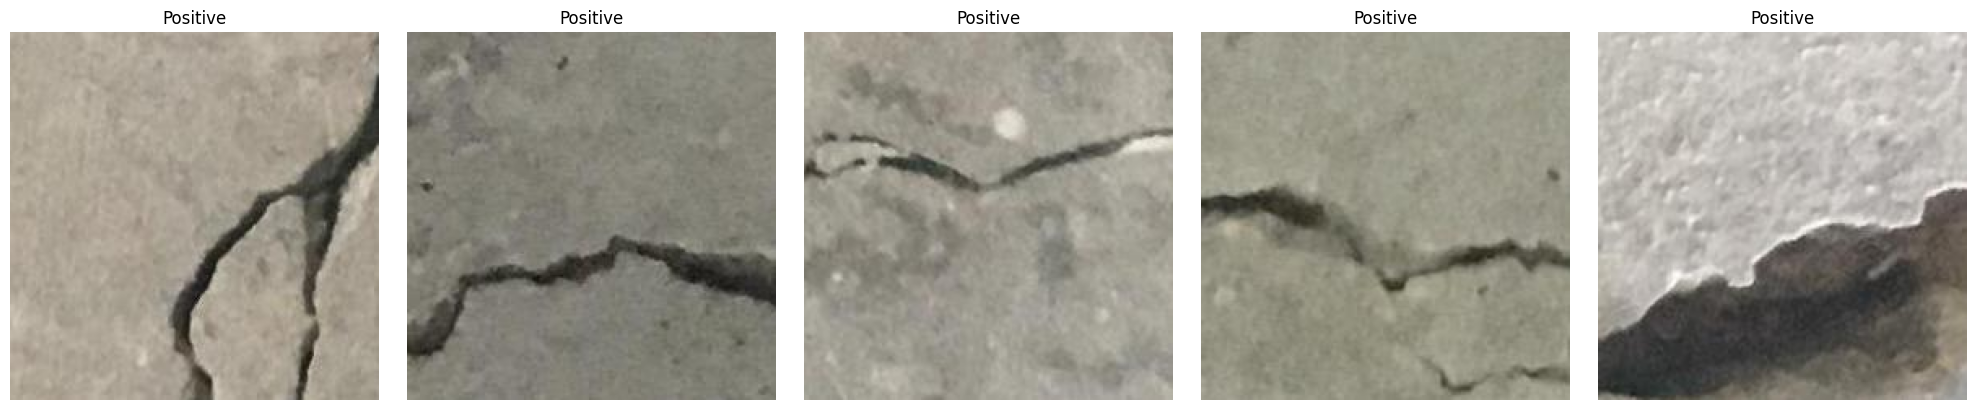

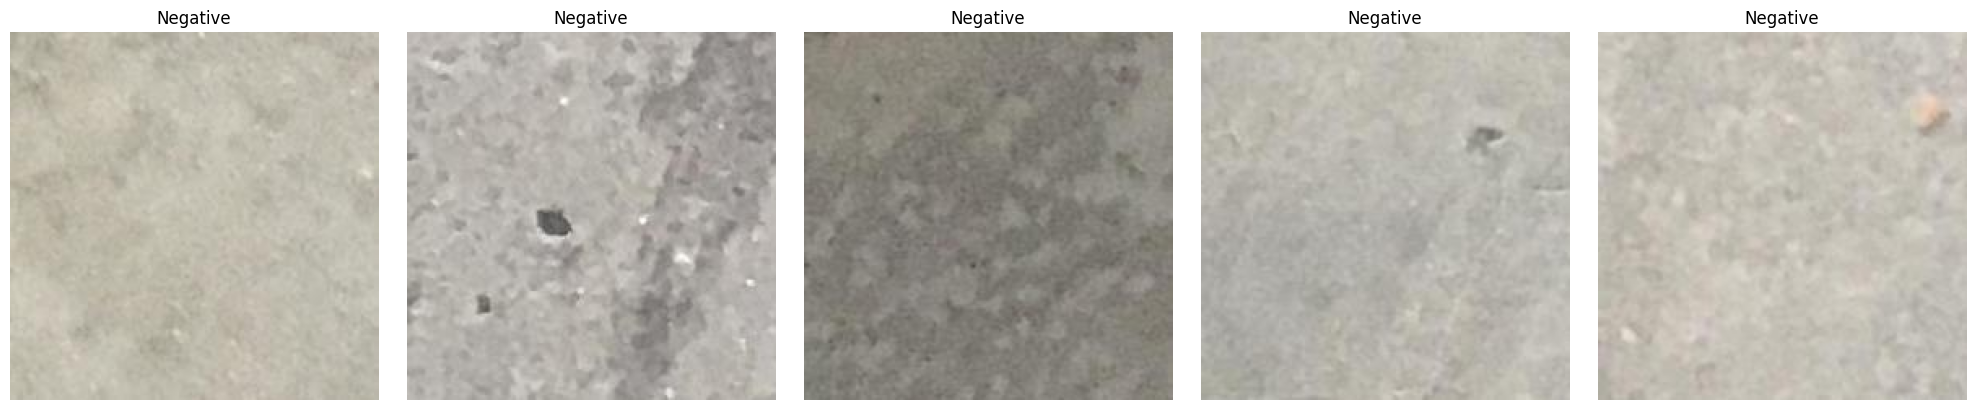

In [8]:
# Display first 5 images from the positive and negative sets of the training dataset
positive_images = os.listdir(os.path.join(train_dir, 'Positive'))[:5]
negative_images = os.listdir(os.path.join(train_dir, 'Negative'))[:5]

positive_images_paths = [os.path.join(train_dir, 'Positive', img) for img in positive_images]
negative_images_paths = [os.path.join(train_dir, 'Negative', img) for img in negative_images]

display_images(positive_images_paths, ['Positive'] * len(positive_images_paths), rows=1)
display_images(negative_images_paths, ['Negative'] * len(negative_images_paths), rows=1)


In [9]:
# Step 2: Load and preprocess data
data_generator = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = data_generator.flow_from_directory(
    train_dir,
    target_size=(image_resize, image_resize),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True)

validation_generator = data_generator.flow_from_directory(
    valid_dir,
    target_size=(image_resize, image_resize),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False)


Found 1936 images belonging to 2 classes.
Found 668 images belonging to 2 classes.


In [10]:
# Step 3: Model setup and training
model = Sequential([
    ResNet50(include_top=False, weights='imagenet', pooling='avg'),
    Dense(num_classes, activation='softmax')
])
model.layers[0].trainable = False

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit_generator(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=2)


94765736/94765736 [==============================] - 0s 0us/step


<ipython-input-10-e3a4fdd33d55>:10: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(


Epoch 1/2
60/60 [==============================] - 619s 10s/step - loss: 0.1691 - accuracy: 0.9307 - val_loss: 0.0229 - val_accuracy: 0.9906
Epoch 2/2
60/60 [==============================] - 538s 9s/step - loss: 0.0137 - accuracy: 0.9979 - val_loss: 0.0161 - val_accuracy: 0.9937


In [11]:
def predict_image(model, img_path):
    img = image.load_img(img_path, target_size=(image_resize, image_resize))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    img_preprocessed = preprocess_input(img_array_expanded_dims)

    prediction = model.predict(img_preprocessed)
    if prediction[0][0] > prediction[0][1]:
        print("The image is predicted to be Not Cracked.")
    else:
        print("The image is predicted to be Cracked.")

# Example usage
test_image_path = '/content/drive/MyDrive/Bridge inspection drone/Test /02-fiberglass-cracks_jpg.rf.4569966294f8f4251ecf9962c004e747.jpg'  # Update this path
predict_image(model, test_image_path)

1/1 [==============================] - 2s 2s/step
The image is predicted to be Cracked.
